In [1]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import math

### A tutorial on formulate likelihood function to estimate parameters for given probability distributions

Let $f(y|w)$ denote the probability density function (PDF) that specifies the probability of observing data vector $y = (y_{1}, y_{2},...,y_{m})$ given the parameter $w = (w_{1},w_{2},...,w_{k})$.

#### Let's start with a simple biased coin example

Assuming we have a biased coin - the number of successes in a series of 10 Bernoulli trials ($n=10$), and the probability of a success on any trial is $0.2$ (i.e. $w=0.2$):

$f(y|n = 10, w = 0.2)=\binom{10}{y}(0.2)^{y}(0.8)^{10-y}=\frac{10!}{y!(10-y)!}(0.2)^{y}(0.8)^{10-y}$

where ($y = 0,1,...,10$)

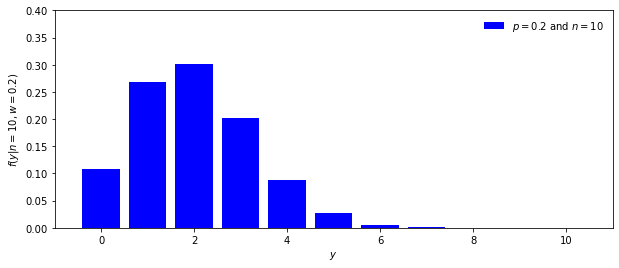

In [3]:
fig = plt.figure(figsize=(10, 4))

x = np.arange(0, 10, 1)

ax = fig.add_subplot(111)

y_pmf = binom.pmf(x, p=0.2, n = 10, loc=0)
ax.bar(x,y_pmf, color='blue', label='$p= 0.2$ and $n=10$')
#ax.plot(y_pmf, color='blue', label='$p= 0.6$ and $n=40$', marker='+', linestyle='dashed')
ax.set_xlabel('$y$')
ax.set_ylabel('$f(y|n=10, w = 0.2)$')
ax.set_xlim([-1.0, 11])
ax.set_ylim([0.0, 0.4])
ax.legend(frameon=False)


This can be further generalised into:

$f(y|n, w)=\binom{n}{y}(w)^{y}(1-w)^{n-y}=\frac{n!}{y!(n-y)!}(w)^{y}(1-w)^{n-y}$

where ($y = 0,1,...,n$)

#### But in a real-world problem, we may not know the underlying success rate ($w=0.2$). In contrast, we do experiments, and based upon the experiment results, we can _inversely_ derive the underlying success rate (i.e. our parameters) using MLE method.

Likelihood $L(w|y) = f(y|w)$

#### Now let's do an experiment: we toss the coin 10 times ($n = 10$), and we get 7 heads/sucesses ($y=7$). Based upon this experiment, we want to estimate $w$.

1. We can first estimate $w$ with our instinct. That is, based upon the result of our single experiment: $w=\frac{7}{10}=0.7$

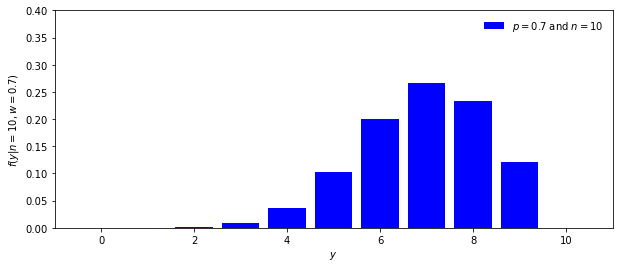

In [5]:
fig = plt.figure(figsize=(10, 4))

x = np.arange(0, 10, 1)

ax2 = fig.add_subplot(111)

y_pmf2 = binom.pmf(x, p=0.7, n = 10, loc=0)
ax2.bar(x,y_pmf2, color='blue', label='$p= 0.7$ and $n=10$')
#ax.plot(y_pmf, color='blue', label='$p= 0.6$ and $n=40$', marker='+', linestyle='dashed')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$f(y|n=10, w = 0.7)$')
ax2.set_xlim([-1.0, 11])
ax2.set_ylim([0.0, 0.4])
ax2.legend(frameon=False)

plt.show()

2. Alternatively, we can formulate the likelihood function.

That is:

$L(w|n=10, y=7) = f(y=7|n=10,w) = \binom{10}{7}w^{7}(1-w)^3 = \frac{10!}{7!3!}w^{7}(1-w)^3$

where ($0 \leq w \leq 1$)

This can be further generalised into:
$L(w|n, y) = f(y|n,w) = \binom{n}{y}w^{y}(1-w)^{n-y} = \frac{n!}{y!(n-y)!}w^{y}(1-w)^{n-y}$

2.1 Let's define a function for this likelihood function

In [6]:
def likelihood_binomdist(n=10, y=7):
    x = np.linspace(0,1,100)
    y_L = math.factorial(n)/math.factorial(y)/math.factorial(n-y)*x**y*(1-x)**(n-y)
    #y_L = binom.pmf(k=y, n = n,p = x)
    return x, y_L

2.2 Let's try a range of $w$ values to see which $w$ leads to the maximum likelihood

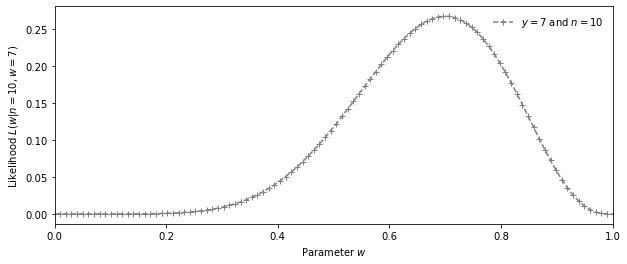

In [7]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)


w, L_Binom = likelihood_binomdist(n=10, y=7)
ax.plot(w,L_Binom, color='grey', label='$y=7$ and $n=10$', marker='+', linestyle='dashed')
ax.set_xlabel('Parameter $w$')
ax.set_ylabel('Likelihood $L(w|n=10, w = 7)$')
ax.set_xlim([0, 1])
#ax.set_ylim([0.0, 0.4])
ax.legend(frameon=False)

plt.show()

#### As we can see, the maximum likelihood happens as $w=0.7$, which is consistent with our instinct. 

#### However, the real-world problem is often much more complicated. Instead of doing a single experiment, we have to do a series of expriments.

Recalling data vector $y = (y_{1}, y_{2},...,y_{m})$, we obtain

$f(y|w) = f(y_{1},y_{2},...,y_{m}|w)$

Then,

Likelihood $L(w|y) = f(y|w)= f(y_{1},y_{2},...,y_{m}|w)$.

If data samples ($y_{1}, y_{2},...,y_{m}$) are i.i.d, their joint density is the product of the marginal densities, and the likelihood is:

$L(w|y) = L(w) = f(y_{1},y_{2},...,y_{m}|w) = \prod_{i=1}^{m} f(y_{i}|w)$

And the maximum likelihood estimate (MLE) of $w$ is that value of $w$ that maximises the likelihood -- that is, makes the observed data "most likely."

In practice, rather than working with the likelihood itself, it is usually easier to work with its natural logarithm, so the log maximum likelihood is:

$\log L(w|y) = \sum_{i=1}^{m} \log[f(y_{i}|w)]$.

#### Let's go back our bias coin example. This time we do three experiments; each time we toss the coin 10 times, and we obtain 6, 7 and 8 times of heads. We can then re-formulate our likelihood function to:

$L(w|n=10, y=(6,7,8)) = f(y=(6,7,8)|n=10,w) = (\binom{10}{6}w^{6}(1-w)^{4})(\binom{10}{7}w^{7}(1-w)^{3})(\binom{10}{8}w^{8}(1-w)^{2}) = (\frac{10!}{6!4!}w^{6}(1-w)^{4})(\frac{10!}{7!3!}w^{7}(1-w)^{3})(\frac{10!}{8!2!}w^{8}(1-w)^{2})$

or 

$\log L(w|n=10, y=(6,7,8)) = \log(\frac{10!}{6!4!}w^{6}(1-w)^{4}) + \log(\frac{10!}{7!3!}w^{7}(1-w)^{3}) + \log(\frac{10!}{8!2!}w^{8}(1-w)^{2})$

In [8]:
def likelihood_binomdist_N(n, y):
    x = np.linspace(0,1,100)
    y_L = 1.0;
    for yy in y:
        #y_L *= math.factorial(n)/math.factorial(yy)/math.factorial(n-yy)*x**yy*(1-x)**(n-yy)
        y_L *= binom.pmf(k=yy, n = n, p = x)
    return x, y_L

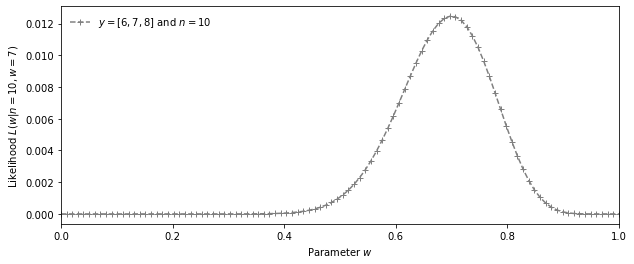

In [9]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

y = [6, 7, 8]

w, L_Binom = likelihood_binomdist_N(n=10, y=y)
ax.plot(w,L_Binom, color='grey', label='$y=[6,7,8]$ and $n=10$', marker='+', linestyle='dashed')
ax.set_xlabel('Parameter $w$')
ax.set_ylabel('Likelihood $L(w|n=10, w = 7)$')
ax.set_xlim([0, 1])
#ax.set_ylim([0.0, 0.4])
ax.legend(frameon=False)

plt.show()

Instead of likelihood, we can try log-likelihood version

In [12]:
def log_likelihood_binomdist_N(n, y):
    x = np.linspace(0,1,100)
    y_L = 0.0;
    for yy in y:
        y_L += binom.logpmf(k=yy, n = n, p = x)
    return x, y_L

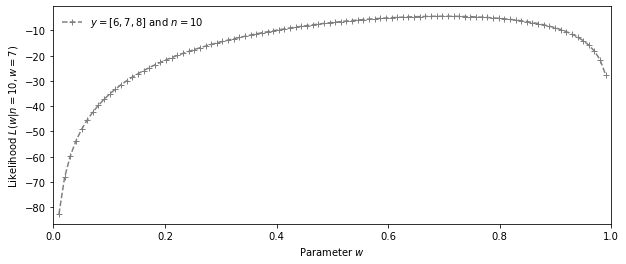

In [13]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

y = [6, 7, 8]

w, L_Binom = log_likelihood_binomdist_N(n=10, y=y)
ax.plot(w,L_Binom, color='grey', label='$y=[6,7,8]$ and $n=10$', marker='+', linestyle='dashed')
ax.set_xlabel('Parameter $w$')
ax.set_ylabel('Likelihood $L(w|n=10, w = 7)$')
ax.set_xlim([0, 1])
#ax.set_ylim([0.0, 0.4])
ax.legend(frameon=False)

plt.show()